<a href="https://colab.research.google.com/github/Azzedde/My-Workshops/blob/main/Build_GPT_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
We will dive into the inner workings of **GPT models** and reveals that they are essentially sequence completion neural networks. These networks are designed to fill in the missing parts of a user's input or prompt.

More technically, GPT (Generatively Pre-trained **Transformer**) is a direct result of the "**Attention is all you need**" paper 2017, which was initially intended for Language Translation tasks.

One way to explain GPT in an educational manner is to create a scaled-down version of it, where the small model generates characters instead of words, based on a sequence of characters.


# Before GPT
**1. ML Methods in NLP**

Machine Learning (ML) methods have revolutionized Natural Language Processing (NLP). These techniques involve training models on large text datasets to perform tasks like sentiment analysis, text classification, and machine translation. However, traditional ML models often struggle with understanding context and semantics, relying heavily on handcrafted features. This limitation paves the way for more advanced approaches like Recurrent Neural Networks (RNNs).

**2. RNNs: A Solution for Context**

Recurrent Neural Networks (RNNs) address the contextual understanding issue in NLP. Unlike traditional ML methods, RNNs have a hidden state that captures information from previous time steps, making them well-suited for sequential data like text. However, vanilla RNNs have a problem called the vanishing gradient, which makes them unable to capture long-range dependencies. To overcome this, Long Short-Term Memory networks (LSTMs) were introduced.
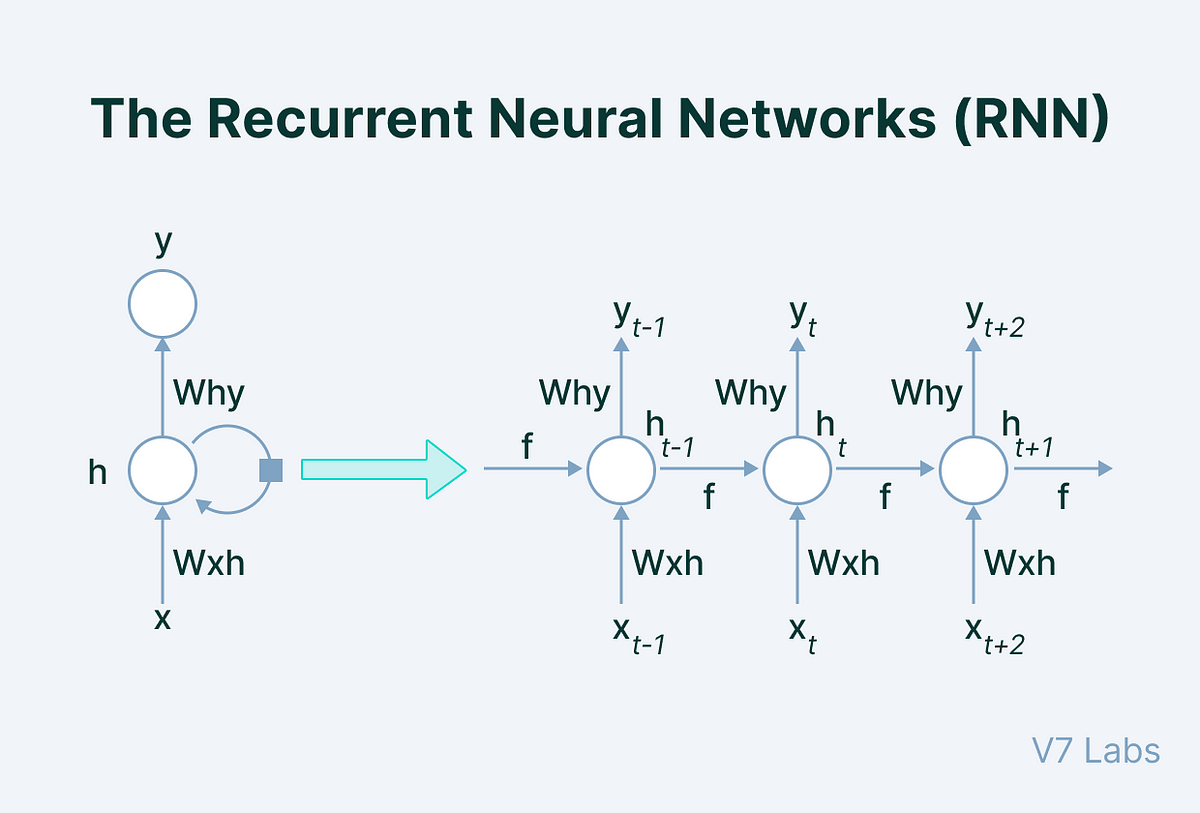

**3. LSTMs: Tackling Long-range Dependencies**

LSTMs are a type of RNN designed to overcome the vanishing gradient problem. They have a more complex architecture with gating mechanisms that enable them to capture long-range dependencies and remember important information over extended sequences. While LSTMs have significantly improved the performance of NLP models, they can still be computationally expensive and prone to overfitting. To address these issues, the next section explores the concept of Transformer models in NLP, which has become a breakthrough solution in recent years.
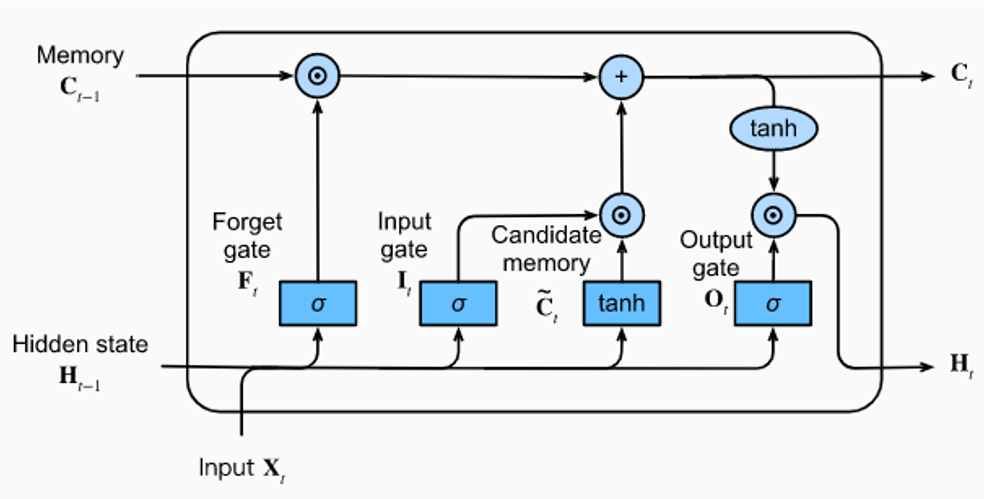

# Transformers
Transformers are a class of machine learning models that have gained immense popularity in natural language processing (NLP), computer vision, and beyond. They were introduced in the seminal paper "Attention is All You Need" by Vaswani et al. in 2017

Transformers were developed to solve the problem of **[sequence transduction](https://arxiv.org/abs/1211.3711),** or **neural machine translation.** That means any task that transforms an input sequence to an output sequence. This includes speech recognition, text-to-speech transformation, etc..

For models to perform model transduction, they need some sort of memory where we store context in it, because of some sort of reformulations. Per example: *“The Transformers” are a Japanese band. The band was formed in 1968, during the height of Japanese music history”*

In this example, the word “the band” in the second sentence refers to the band “The Transformers” introduced in the first sentence. When you read about the band in the second sentence, you know that it is referencing to the “The Transformers” band. That may be important for translation and many other tasks like text completion. There are many examples, where words in some sentences refer to words in previous sentences.
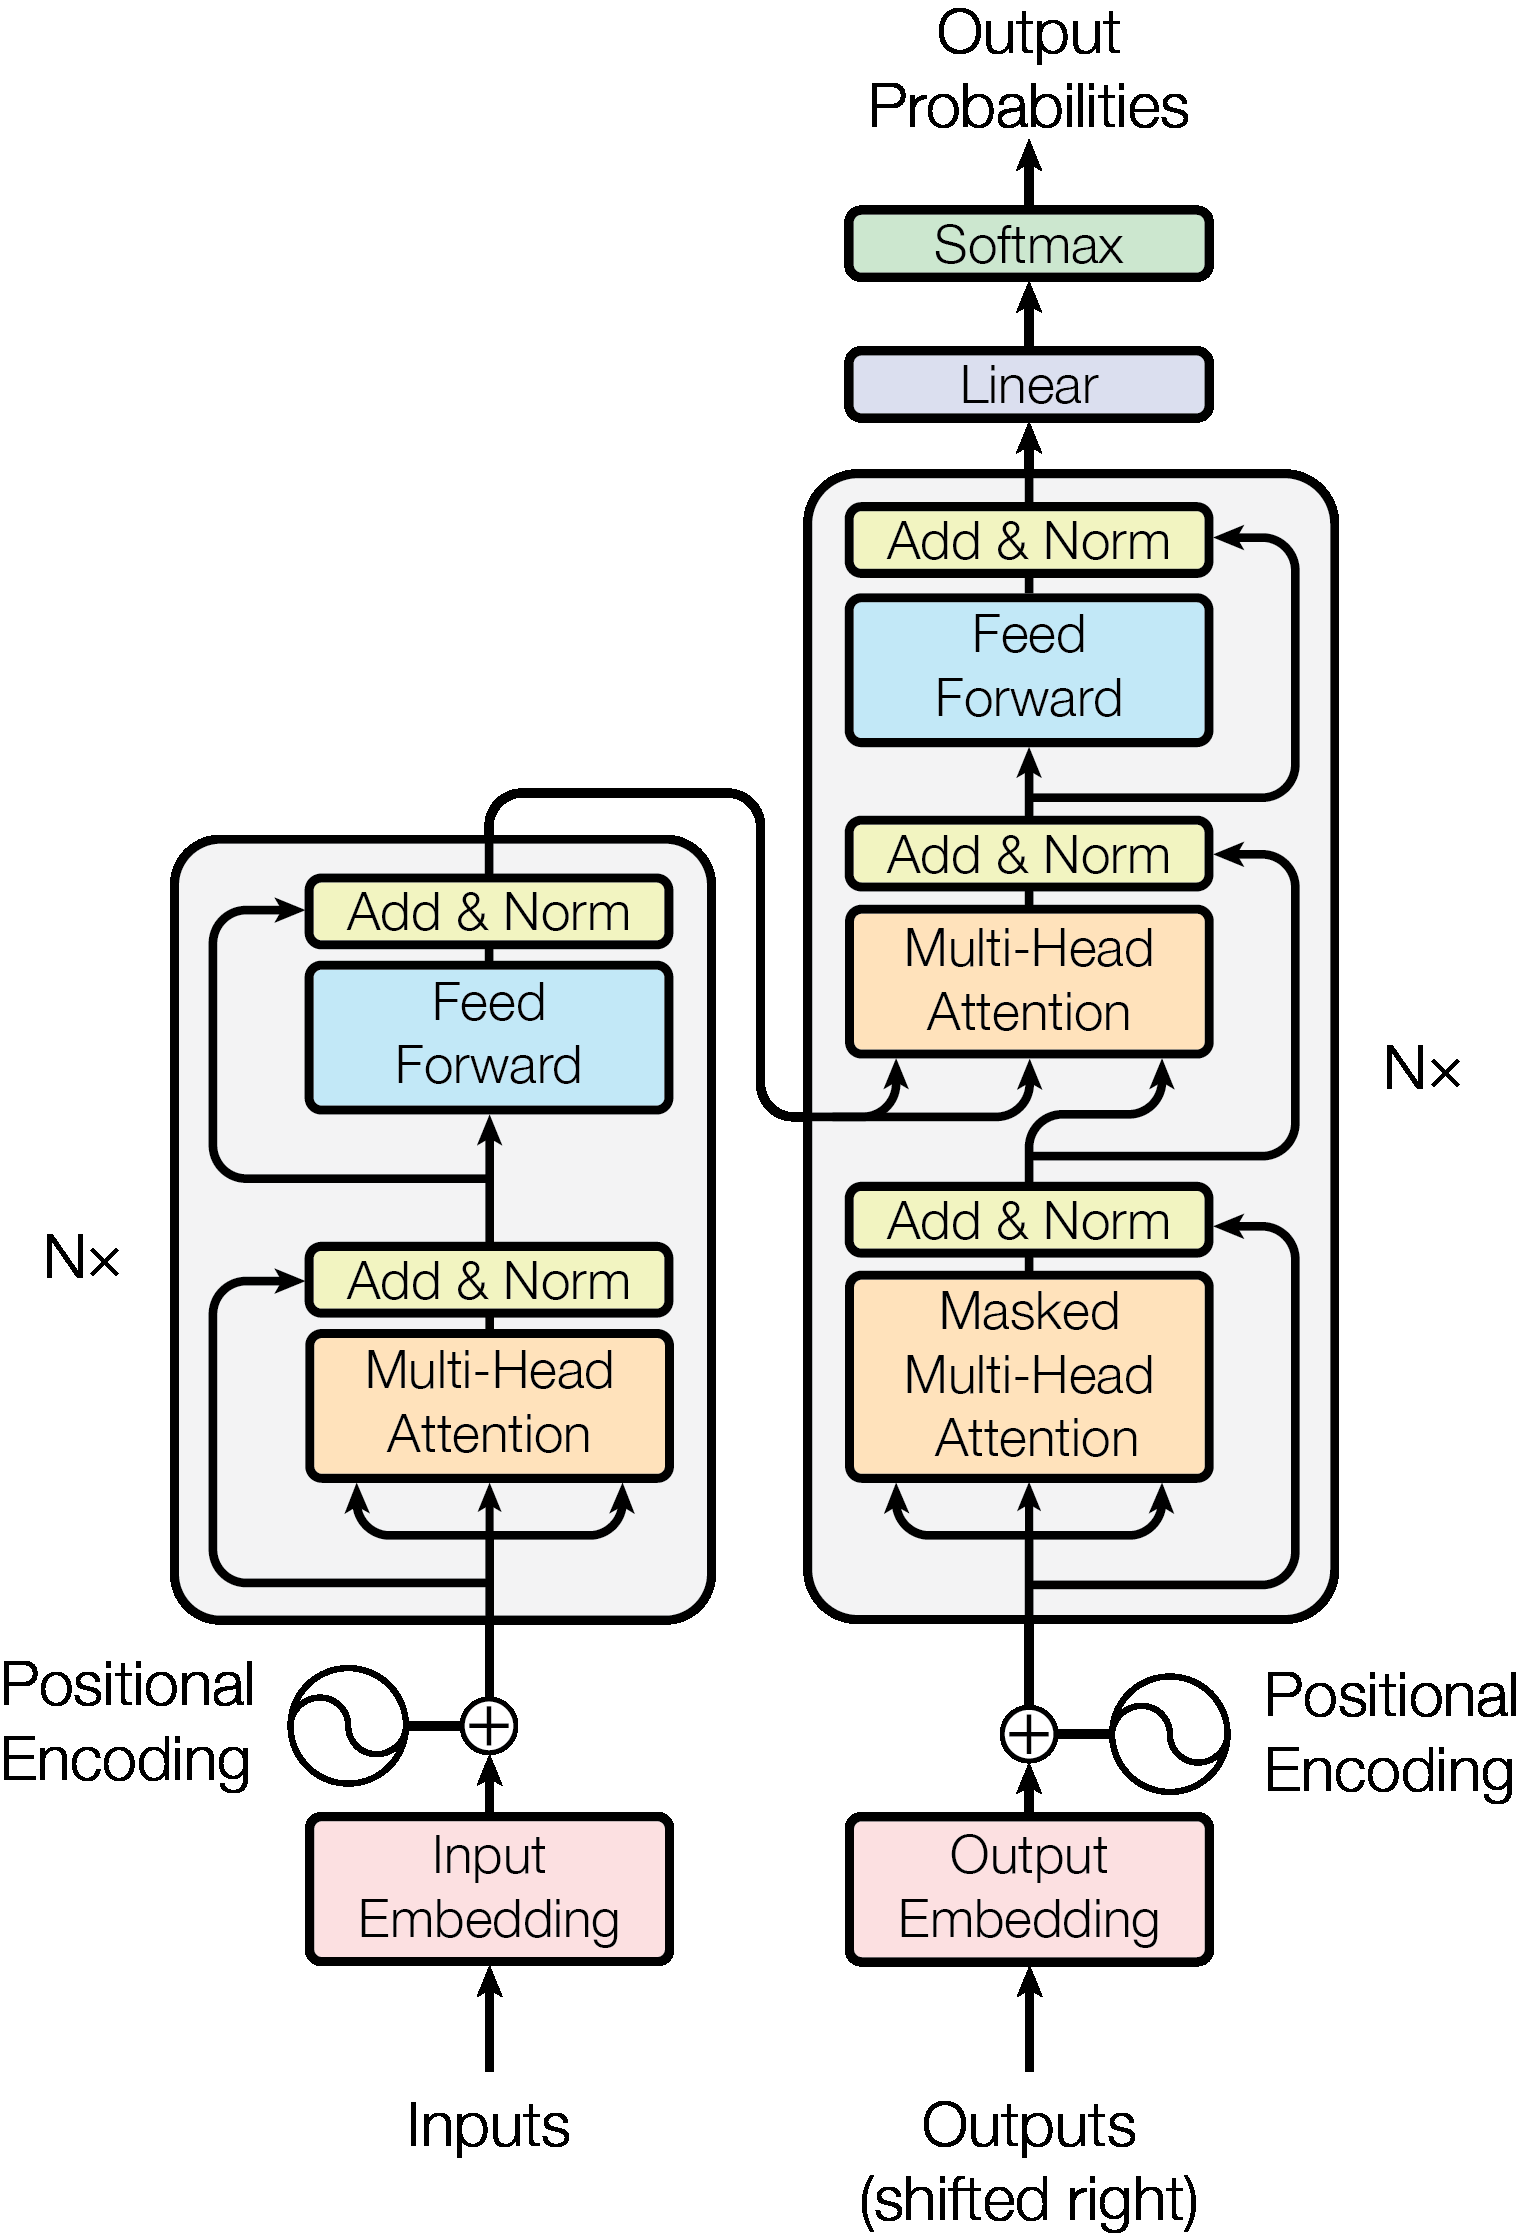

## [GPT](https://s3-us-west-2.amazonaws.com/openai-assets/research-covers/language-unsupervised/language_understanding_paper.pdf):

In the realm of natural language processing, the advent of Generative Pretrained **Transformer** (GPT) models marks a significant milestone. These models, characterized by their deep architecture and immense parameter scale, have demonstrated unprecedented capabilities in generating human-like text offering promising applications in various domains.

### 1. **Architectural Sophistication:**

The underpinning of GPT lies in the Transformer architecture, renowned for its self-attention mechanism. This mechanism adeptly captures contextual relationships between tokens in a sequence, enabling the model to generate text that is not only syntactically correct but also semantically coherent. The parallel processing capability of the **Transformer** architecture facilitates efficient training, albeit the computational resources required remain substantial.

### 2. **Training Paradigm:**

The training paradigm of GPT models involves a two-step process: pretraining and fine-tuning. In the pretraining phase, the model is exposed to vast corpora of text data, allowing it to learn the intricate patterns, structures, and nuances of natural language. The **fine-tuning** phase is task-specific, where the pretrained model is refined on a smaller dataset to optimize its performance for particular applications.

### 3. **Generative Capabilities:**

GPT’s generative capabilities stem from its training objective to predict the subsequent token in a given sequence. This objective, optimized using maximum likelihood estimation, results in a model that can generate contextually relevant and coherent text. The applications are diverse, spanning from content creation and augmentation to the development of intelligent conversational agents.



---



# Building a GPT


The small GPT model we’ll be creating will be trained on the [tiny Shakespeare dataset](https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt) it has a size of 1Mo, and 1 million characters roughly.

In [1]:
# We always start with a dataset to train on. Let's download the tiny shakespeare dataset
!wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt

--2023-11-11 08:12:37--  https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1115394 (1.1M) [text/plain]
Saving to: ‘input.txt’

input.txt           100%[===================>]   1.06M  --.-KB/s    in 0.06s   

2023-11-11 08:12:38 (17.7 MB/s) - ‘input.txt’ saved [1115394/1115394]



In [2]:
# read it in to inspect it
with open('input.txt', 'r', encoding='utf-8') as f:
    text = f.read()

In [3]:
print("length of dataset in characters: ", len(text))

length of dataset in characters:  1115394


In [4]:
# let's look at the first 1000 characters
print(text[:1000])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.

All:
We know't, we know't.

First Citizen:
Let us kill him, and we'll have corn at our own price.
Is't a verdict?

All:
No more talking on't; let it be done: away, away!

Second Citizen:
One word, good citizens.

First Citizen:
We are accounted poor citizens, the patricians good.
What authority surfeits on would relieve us: if they
would yield us but the superfluity, while it were
wholesome, we might guess they relieved us humanely;
but they think we are too dear: the leanness that
afflicts us, the object of our misery, is as an
inventory to particularise their abundance; our
sufferance is a gain to them Let us revenge this with
our pikes, ere we become rakes: for the gods know I
speak this in hunger for bread, not in thirst for revenge.



In [5]:
# here are all the unique characters that occur in this text
chars = sorted(list(set(text)))
vocab_size = len(chars)
print(''.join(chars))
print(vocab_size)


 !$&',-.3:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz
65


We will start by tokenizing the data: convert the raw text as a string to some sequence of integers according to some vocabulary of possible elements (in our case the vocabulary is the previous . In this case we will turn each character into a numerical representation (we will do a mapping):

In [6]:
# create a mapping from characters to integers
stoi = { ch:i for i,ch in enumerate(chars) }
itos = { i:ch for i,ch in enumerate(chars) }
encode = lambda s: [stoi[c] for c in s] # encoder: take a string, output a list of integers
decode = lambda l: ''.join([itos[i] for i in l]) # decoder: take a list of integers, output a string

print(encode("hii there"))
print(decode(encode("hii there")))

[46, 47, 47, 1, 58, 46, 43, 56, 43]
hii there


In [7]:
# let's now encode the entire text dataset and store it into a torch.Tensor
import torch # we use PyTorch: https://pytorch.org
data = torch.tensor(encode(text), dtype=torch.long)
print(data.shape, data.dtype)
print(data[:1000]) # the 1000 characters we looked at earier will to the GPT look like this

torch.Size([1115394]) torch.int64
tensor([18, 47, 56, 57, 58,  1, 15, 47, 58, 47, 64, 43, 52, 10,  0, 14, 43, 44,
        53, 56, 43,  1, 61, 43,  1, 54, 56, 53, 41, 43, 43, 42,  1, 39, 52, 63,
         1, 44, 59, 56, 58, 46, 43, 56,  6,  1, 46, 43, 39, 56,  1, 51, 43,  1,
        57, 54, 43, 39, 49,  8,  0,  0, 13, 50, 50, 10,  0, 31, 54, 43, 39, 49,
         6,  1, 57, 54, 43, 39, 49,  8,  0,  0, 18, 47, 56, 57, 58,  1, 15, 47,
        58, 47, 64, 43, 52, 10,  0, 37, 53, 59,  1, 39, 56, 43,  1, 39, 50, 50,
         1, 56, 43, 57, 53, 50, 60, 43, 42,  1, 56, 39, 58, 46, 43, 56,  1, 58,
        53,  1, 42, 47, 43,  1, 58, 46, 39, 52,  1, 58, 53,  1, 44, 39, 51, 47,
        57, 46, 12,  0,  0, 13, 50, 50, 10,  0, 30, 43, 57, 53, 50, 60, 43, 42,
         8,  1, 56, 43, 57, 53, 50, 60, 43, 42,  8,  0,  0, 18, 47, 56, 57, 58,
         1, 15, 47, 58, 47, 64, 43, 52, 10,  0, 18, 47, 56, 57, 58,  6,  1, 63,
        53, 59,  1, 49, 52, 53, 61,  1, 15, 39, 47, 59, 57,  1, 25, 39, 56, 41,
      

There are many other alternative algorithms to tokenization such as **SentencePiece** from Google and **tiktoken** from OpenAI. In practice we don’t often tokenize characters nor entire words, but sub-words ! We observe that the larger the vocabulary size → the smaller each sequence of encoding. we see that a “hii there” is 8 numbers length using our encoding but is 3 numbers length using tiktoken.

Now that we have  a representation of the dataset in numerical values (which are values we can train models with), we proceed to train the model.

In [8]:
# Let's now split up the data into train and validation sets
n = int(0.9*len(data)) # first 90% will be train, rest val
train_data = data[:n]
val_data = data[n:]

In [9]:
block_size = 8
train_data[:block_size+1]

tensor([18, 47, 56, 57, 58,  1, 15, 47, 58])

It won’t computationally efficient if we train the data directly: we should split it into chunks of a given size and sample random chunks to perform the training, the interesting part of these chunks is that they contain inside of them a number of samples similar to their size, for example: if we take this chunk tensor([18, 47, 56, 57, 58, 1, 15, 47, 58]) then we can see that the training data might be like this (8 examples packed inside the chunk)

In [10]:
x = train_data[:block_size]
y = train_data[1:block_size+1]
for t in range(block_size):
    context = x[:t+1]
    target = y[t]
    print(f"when input is {context} the target: {target}")

when input is tensor([18]) the target: 47
when input is tensor([18, 47]) the target: 56
when input is tensor([18, 47, 56]) the target: 57
when input is tensor([18, 47, 56, 57]) the target: 58
when input is tensor([18, 47, 56, 57, 58]) the target: 1
when input is tensor([18, 47, 56, 57, 58,  1]) the target: 15
when input is tensor([18, 47, 56, 57, 58,  1, 15]) the target: 47
when input is tensor([18, 47, 56, 57, 58,  1, 15, 47]) the target: 58


Now it should be interesting if we parallelize the training of the chunks in batches in order to speed up the global training process. Se we create a function to get batches randomly (or specifically an offset to get an interval of rows).

In [11]:
torch.manual_seed(1337)
batch_size = 4 # how many independent sequences will we process in parallel?
block_size = 8 # what is the maximum context length for predictions?

def get_batch(split):
    # generate a small batch of data of inputs x and targets y
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([data[i:i+block_size] for i in ix])
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
    return x, y

xb, yb = get_batch('train')
print('inputs:')
print(xb.shape)
print(xb)
print('targets:')
print(yb.shape)
print(yb)

print('----')

for b in range(batch_size): # batch dimension
    for t in range(block_size): # time dimension
        context = xb[b, :t+1]
        target = yb[b,t]
        print(f"when input is {context.tolist()} the target: {target}")

inputs:
torch.Size([4, 8])
tensor([[24, 43, 58,  5, 57,  1, 46, 43],
        [44, 53, 56,  1, 58, 46, 39, 58],
        [52, 58,  1, 58, 46, 39, 58,  1],
        [25, 17, 27, 10,  0, 21,  1, 54]])
targets:
torch.Size([4, 8])
tensor([[43, 58,  5, 57,  1, 46, 43, 39],
        [53, 56,  1, 58, 46, 39, 58,  1],
        [58,  1, 58, 46, 39, 58,  1, 46],
        [17, 27, 10,  0, 21,  1, 54, 39]])
----
when input is [24] the target: 43
when input is [24, 43] the target: 58
when input is [24, 43, 58] the target: 5
when input is [24, 43, 58, 5] the target: 57
when input is [24, 43, 58, 5, 57] the target: 1
when input is [24, 43, 58, 5, 57, 1] the target: 46
when input is [24, 43, 58, 5, 57, 1, 46] the target: 43
when input is [24, 43, 58, 5, 57, 1, 46, 43] the target: 39
when input is [44] the target: 53
when input is [44, 53] the target: 56
when input is [44, 53, 56] the target: 1
when input is [44, 53, 56, 1] the target: 58
when input is [44, 53, 56, 1, 58] the target: 46
when input is [44, 53

In [12]:
print(xb) # our input to the transformer

tensor([[24, 43, 58,  5, 57,  1, 46, 43],
        [44, 53, 56,  1, 58, 46, 39, 58],
        [52, 58,  1, 58, 46, 39, 58,  1],
        [25, 17, 27, 10,  0, 21,  1, 54]])


A bigram model predicts the next token in a sequence based on the previous token.

In [13]:
import torch
import torch.nn as nn
from torch.nn import functional as F
torch.manual_seed(1337)

class BigramLanguageModel(nn.Module):

    def __init__(self, vocab_size):
        super().__init__()
        # each token directly reads off the logits for the next token from a lookup table
        self.token_embedding_table = nn.Embedding(vocab_size, vocab_size)

    def forward(self, idx, targets=None):

        # idx and targets are both (B,T) tensor of integers
        logits = self.token_embedding_table(idx) # (B,T,C)

        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)

        return logits, loss

    def generate(self, idx, max_new_tokens):
        # idx is (B, T) array of indices in the current context
        for _ in range(max_new_tokens):
            # get the predictions
            logits, loss = self(idx)
            # focus only on the last time step
            logits = logits[:, -1, :] # becomes (B, C)
            # apply softmax to get probabilities
            probs = F.softmax(logits, dim=-1) # (B, C)
            # sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
            # append sampled index to the running sequence
            idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
        return idx

m = BigramLanguageModel(vocab_size)
logits, loss = m(xb, yb)
print(logits.shape)
print(loss)

print(decode(m.generate(idx = torch.zeros((1, 1), dtype=torch.long), max_new_tokens=100)[0].tolist()))


torch.Size([32, 65])
tensor(4.8786, grad_fn=<NllLossBackward0>)

Sr?qP-QWktXoL&jLDJgOLVz'RIoDqHdhsV&vLLxatjscMpwLERSPyao.qfzs$Ys$zF-w,;eEkzxjgCKFChs!iWW.ObzDnxA Ms$3


The constructor takes **`vocab_size`** as an input, which is the total number of unique tokens in the vocabulary. It initializes an embedding table using **`nn.Embedding`**. The embedding table is a **learnable parameter** of the model and is used to convert token indices into embeddings.

###Embedding Table

The embedding table (**`self.token_embedding_table`**) is crucial. It's a matrix where each row corresponds to a unique token in the vocabulary. The number of rows is equal to **`vocab_size`**, and interestingly, in this model, the number of columns is also equal to **`vocab_size`**. This is not typical; usually, the number of columns (embedding dimension) is much smaller.

In this model, the embedding table is used to predict the next token directly. Each row of the embedding table can be seen as the **logits** for predicting the next token given a current token. Since the number of columns is equal to **`vocab_size`**, it can directly be used in the cross-entropy loss without any additional linear layer.

Each row in the embedding table corresponds to a token in the vocabulary, and each column corresponds to the logits for predicting each possible next token. So, if you have a vocabulary of size 1000, the embedding table will be a 1000x1000 matrix. If the current token is represented by index 5, the model will use the 5th row of the embedding table as the logits for predicting the next token.

This is a simplified and direct way of modeling the conditional probabilities of tokens given the previous token, which is characteristic of a bigram model. Each element in the embedding table can be seen as modeling the probability of a specific bigram (pair of adjacent tokens) occurring in the text.

###Logits

Logits are the raw, unnormalized scores or outputs that a model produces. In the context of classification tasks, such as predicting the next character, logits represent the scores assigned to each class (or character, in this case) before they are transformed into probabilities. These scores are then typically passed through a softmax function to convert them into probabilities, which sum to 1, making them interpretable.

###Embedding

An embedding is a dense vector of floating-point values, representing an entity in a continuous vector space. In the context of natural language processing, embeddings are often used to represent words, characters, or tokens. Each unique word or character in the vocabulary is mapped to a distinct vector in this space. Embeddings capture the semantic meanings of words and their relationships with other words.

Why this specific shape ?

In the provided code, the embedding table has a shape of **`(vocab_size, vocab_size)`**. This is unusual because typically, the number of columns (embedding dimension) is much smaller and fixed, not dependent on the vocabulary size.

However, in the context of creating a simplified GPT-like model for predicting the next character, this specific shape can be directly used for prediction. Each row in the embedding table corresponds to a character in the vocabulary, and each column represents the logits for predicting each possible next character. This allows the model to directly use the embeddings as logits for prediction, simplifying the architecture.

In the provided code of the video, **`B`**, **`T`**, and **`C`** represent dimensions of the tensor that holds the logits, and they are commonly used notations in machine learning, especially in the context of sequence models like RNNs, LSTMs, and Transformers (including GPT).

**B - Batch Size**

**`B`** stands for Batch Size. It represents the number of sequences in a mini-batch. In training neural networks, it's common to process multiple samples at once for efficiency, rather than one by one. Each sample in a batch is processed in parallel, and the gradients of the loss with respect to the model parameters are averaged before performing a parameter update.

**T - Sequence Length**

**`T`** stands for the length of the Time steps or sequence. In the context of language modeling, this would be the number of tokens in each sequence. Since we're dealing with sequences of characters or tokens, **`T`** represents how many of those are in each sequence. It can vary from batch to batch if you're not padding your sequences to have the same length.

**C - Number of Classes (or Vocabulary Size in this Context)**

**`C`** stands for the number of Classes, which, in this context, is equivalent to the vocabulary size. Since this is a model for predicting the next character, each "class" corresponds to a unique character in the model's vocabulary. The model's output logits are of dimension **`C`**, and each value represents the unnormalized prediction score for each character in the vocabulary.

We should also talk about

- **`logits = self.token_embedding_table(idx)`** returns a tensor of shape **`(B, T, C)`**. This means for each sequence in the batch (of which there are **`B`**), for each token in each sequence (of which there are **`T`**), there are **`C`** logits values, one for each possible next character in the vocabulary.
- **`B, T, C = logits.shape`** extracts these three dimensions into separate variables for clarity and further processing.
- **`logits = logits.view(B*T, C)`** reshapes the logits tensor for calculating the cross-entropy loss. It combines the batch and sequence length dimensions to treat each token in each sequence in the batch as a separate sample and in order to fit the pytorch formatting.
- In the **`generate`** method, **`logits[:, -1, :]`** selects the logits corresponding to the last token in each sequence in the batch, resulting in a tensor of shape **`(B, C)`**.

### **Forward and Backward Pass**

- **Forward Pass:** The model takes a batch of input sequences, passes them through the embedding layer to get logits, calculates the loss by comparing the logits to the target sequences, and returns the logits and loss.
- **Backward Pass:** Outside of the model, you'd typically call **`loss.backward()`** to compute the gradients of the loss with respect to the model parameters, and then use an optimizer to update the model parameters to minimize the loss.

### Training the model

We will use the adam optimizer and batch size of 32 (which is big), and we perform a typical training loop for a model:

- sample batches
- calculate the logits and the losses
- update (optimize)

In [14]:
# create a PyTorch optimizer
optimizer = torch.optim.AdamW(m.parameters(), lr=1e-3)

In [15]:
batch_size = 32
for steps in range(100): # increase number of steps for good results...

    # sample a batch of data
    xb, yb = get_batch('train')

    # evaluate the loss
    logits, loss = m(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

print(loss.item())


4.587916374206543


In [16]:
print(decode(m.generate(idx = torch.zeros((1, 1), dtype=torch.long), max_new_tokens=500)[0].tolist()))


xiKi-RJ:CgqVuUa!U?qMH.uk!sCuMXvv!CJFfx;LgRyJknOEti.?I&-gPlLyulId?XlaInQ'q,lT$
3Q&sGlvHQ?mqSq-eON
x?SP fUAfCAuCX:bOlgiRQWN:Mphaw
tRLKuYXEaAXxrcq-gCUzeh3w!AcyaylgYWjmJM?Uzw:inaY,:C&OECW:vmGGJAn3onAuMgia!ms$Vb q-gCOcPcUhOnxJGUGSPJWT:.?ujmJFoiNL&A'DxY,prZ?qdT;hoo'dHooXXlxf'WkHK&u3Q?rqUi.kz;?Yx?C&u3Qbfzxlyh'Vl:zyxjKXgC?
lv'QKFiBeviNxO'm!Upm$srm&TqViqiBD3HBP!juEOpmZJyF$Fwfy!PlvWPFC
&WDdP!Ko,px
x
tREOE;AJ.BeXkylOVD3KHp$e?nD,.SFbWWI'ubcL!q-tU;aXmJ&uGXHxJXI&Z!gHRpajj;l.
pTErIBjx;JKIgoCnLGXrJSP!AU-AcbczR?


## A Mathematical trick !

In sequence data, tokens are often isolated and don't interact with each other. However, for tasks like language understanding, it's crucial for tokens to "communicate" or share information with each other. The challenge is to enable this communication efficiently, especially when a token should only interact with its preceding tokens to predict future tokens like in our case.

### **Initial Solution:**

A straightforward solution is to compute the cumulative average of tokens up to each position in the sequence. For instance, the fifth token would consider the values of all tokens from the first to the fifth position. However, doing this with for-loops is computationally expensive and inefficient because we are losing a lot of precise data when accumulating like that, especially for long sequences.

In [17]:
# toy example illustrating how matrix multiplication can be used for a "weighted aggregation"
torch.manual_seed(42)
a = torch.tril(torch.ones(3, 3))
a = a / torch.sum(a, 1, keepdim=True)
b = torch.randint(0,10,(3,2)).float()
c = a @ b
print('a=')
print(a)
print('--')
print('b=')
print(b)
print('--')
print('c=')
print(c)

a=
tensor([[1.0000, 0.0000, 0.0000],
        [0.5000, 0.5000, 0.0000],
        [0.3333, 0.3333, 0.3333]])
--
b=
tensor([[2., 7.],
        [6., 4.],
        [6., 5.]])
--
c=
tensor([[2.0000, 7.0000],
        [4.0000, 5.5000],
        [4.6667, 5.3333]])


The trick lies in optimizing this process using matrix operations and vectorization. Instead of iterating through each token and calculating averages, self-attention employs linear algebra techniques to compute these values simultaneously for all tokens. This vectorized operation is not only faster but also more memory-efficient.

Notes:
- Attention is a **communication mechanism**. Can be seen as nodes in a directed graph looking at each other and aggregating information with a weighted sum from all nodes that point to them, with data-dependent weights.
- There is no notion of space. Attention simply acts over a set of vectors. This is why we need to positionally encode tokens.
- Each example across batch dimension is of course processed completely independently and never "talk" to each other
- In an "encoder" attention block just delete the single line that does masking with `tril`, allowing all tokens to communicate. This block here is called a "decoder" attention block because it has triangular masking, and is usually used in autoregressive settings, like language modeling.
- "self-attention" just means that the keys and values are produced from the same source as queries. In "cross-attention", the queries still get produced from x, but the keys and values come from some other, external source (e.g. an encoder module)
- "Scaled" attention additional divides `wei` by 1/sqrt(head_size). This makes it so when input Q,K are unit variance, wei will be unit variance too and Softmax will stay diffuse and not saturate too much. Illustration below

##Self-attention

In [ ]:
# Set a random seed for reproducibility and define the dimensions for batch, time, and channels
torch.manual_seed(1337)
B, T, C = 4, 8, 32
x = torch.randn(B, T, C)  # Random input tensor

# Define the head size and create linear layers for transforming input tokens into Query, Key, and Value vectors
head_size = 16
key = nn.Linear(C, head_size, bias=False)
query = nn.Linear(C, head_size, bias=False)
value = nn.Linear(C, head_size, bias=False)

# Compute the Query, Key, and Value vectors
k = key(x)
q = query(x)

# Compute the raw attention weights by taking the dot product of Query and Key vectors
wei = q @ k.transpose(-2, -1)

# Apply masking to prevent information flow from future tokens and normalize the weights using softmax
tril = torch.tril(torch.ones(T, T))
wei = wei.masked_fill(tril == 0, float('-inf'))
wei = F.softmax(wei, dim=-1)

# Compute the Value vectors and use the normalized attention weights to compute the final output
v = value(x)
out = wei @ v

# Print the shape of the output tensor
out.shape

### **Key Takeaways:**

- **Query (Q)**: Represents what each token is looking for in other tokens.
- **Key (K)**: Represents the content of each token.
- **Value (V)**: Represents the actual information/content that will be used to compute the final output.
- **Attention Weights**: Computed by taking the dot product of Q and K, then normalized using softmax.
- **Output**: Computed by weighting the V vectors using the attention weights.

- Each token in the sequence emits a Query (Q) to seek information and a Key (K) to advertise its content.
- The dot product between Q and K of all tokens generates a matrix of attention scores, indicating the affinity between tokens.
- This matrix is then masked to avoid looking ahead and normalized to convert scores into probabilities.
- Finally, these probabilities are used to weight the Value (V) vectors of all tokens to produce the output of the self-attention layer.
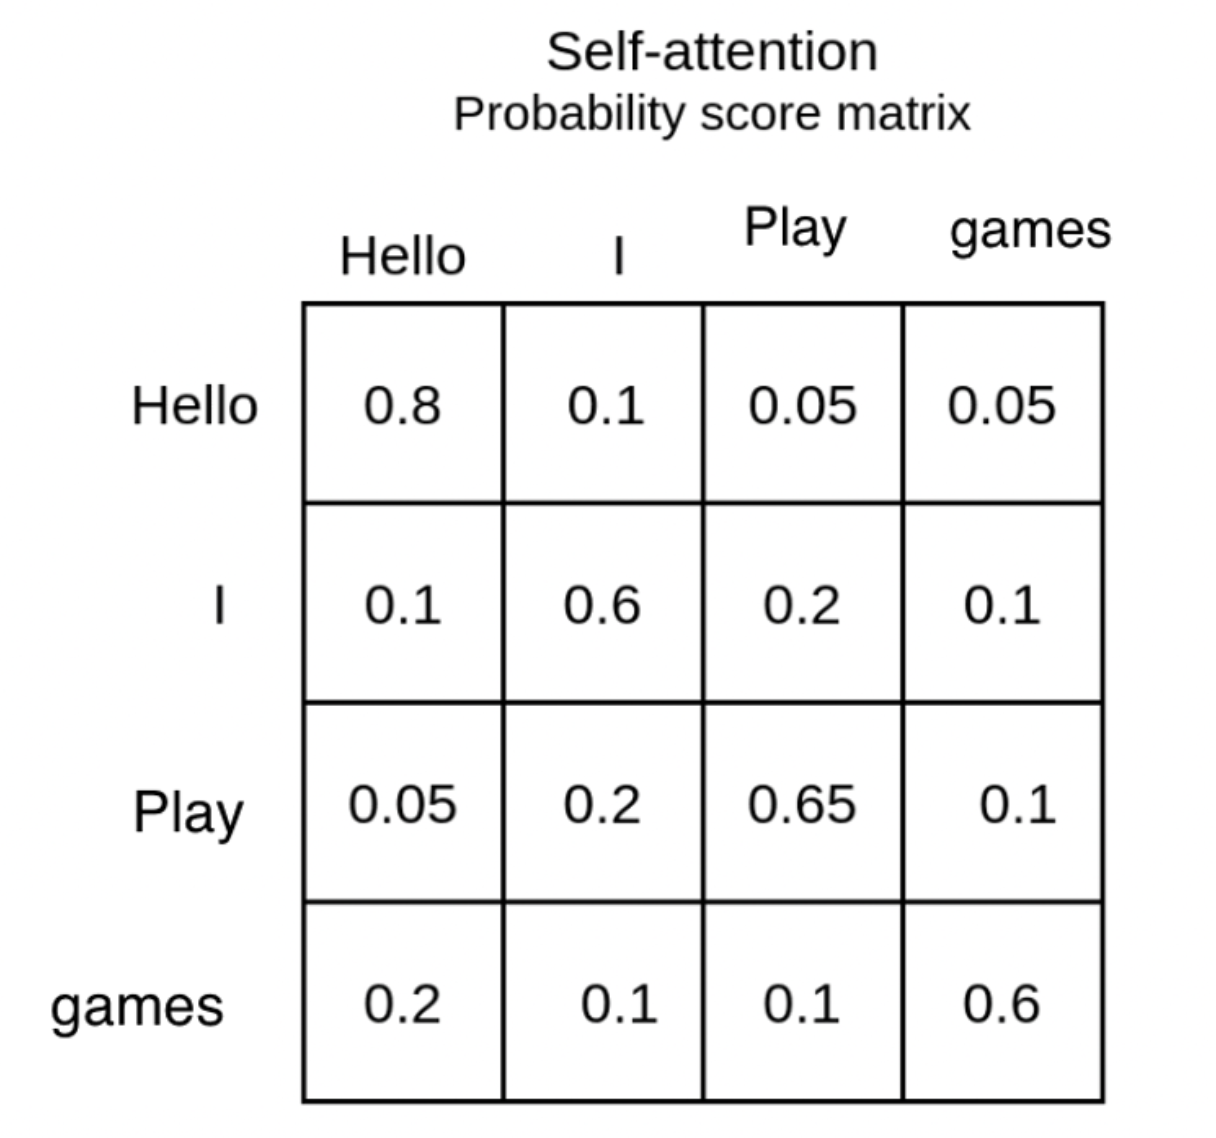

# Full Script Code:

In [ ]:
import torch
import torch.nn as nn
from torch.nn import functional as F

# hyperparameters
batch_size = 16 # how many independent sequences will we process in parallel?
block_size = 32 # what is the maximum context length for predictions?
max_iters = 5000
eval_interval = 100
learning_rate = 1e-3
device = 'cuda' if torch.cuda.is_available() else 'cpu'
eval_iters = 200
n_embd = 64
n_head = 4
n_layer = 4
dropout = 0.0
# ------------

torch.manual_seed(1337)

# wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
with open('input.txt', 'r', encoding='utf-8') as f:
    text = f.read()

# here are all the unique characters that occur in this text
chars = sorted(list(set(text)))
vocab_size = len(chars)
# create a mapping from characters to integers
stoi = { ch:i for i,ch in enumerate(chars) }
itos = { i:ch for i,ch in enumerate(chars) }
encode = lambda s: [stoi[c] for c in s] # encoder: take a string, output a list of integers
decode = lambda l: ''.join([itos[i] for i in l]) # decoder: take a list of integers, output a string

# Train and test splits
data = torch.tensor(encode(text), dtype=torch.long)
n = int(0.9*len(data)) # first 90% will be train, rest val
train_data = data[:n]
val_data = data[n:]

# data loading
def get_batch(split):
    # generate a small batch of data of inputs x and targets y
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([data[i:i+block_size] for i in ix])
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
    x, y = x.to(device), y.to(device)
    return x, y

@torch.no_grad()
def estimate_loss():
    out = {}
    model.eval()
    for split in ['train', 'val']:
        losses = torch.zeros(eval_iters)
        for k in range(eval_iters):
            X, Y = get_batch(split)
            logits, loss = model(X, Y)
            losses[k] = loss.item()
        out[split] = losses.mean()
    model.train()
    return out

class Head(nn.Module):
    """ one head of self-attention """

    def __init__(self, head_size):
        super().__init__()
        self.key = nn.Linear(n_embd, head_size, bias=False)
        self.query = nn.Linear(n_embd, head_size, bias=False)
        self.value = nn.Linear(n_embd, head_size, bias=False)
        self.register_buffer('tril', torch.tril(torch.ones(block_size, block_size)))

        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        B,T,C = x.shape
        k = self.key(x)   # (B,T,C)
        q = self.query(x) # (B,T,C)
        # compute attention scores ("affinities")
        wei = q @ k.transpose(-2,-1) * C**-0.5 # (B, T, C) @ (B, C, T) -> (B, T, T)
        wei = wei.masked_fill(self.tril[:T, :T] == 0, float('-inf')) # (B, T, T)
        wei = F.softmax(wei, dim=-1) # (B, T, T)
        wei = self.dropout(wei)
        # perform the weighted aggregation of the values
        v = self.value(x) # (B,T,C)
        out = wei @ v # (B, T, T) @ (B, T, C) -> (B, T, C)
        return out

class MultiHeadAttention(nn.Module):
    """ multiple heads of self-attention in parallel """

    def __init__(self, num_heads, head_size):
        super().__init__()
        self.heads = nn.ModuleList([Head(head_size) for _ in range(num_heads)])
        self.proj = nn.Linear(n_embd, n_embd)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        out = torch.cat([h(x) for h in self.heads], dim=-1)
        out = self.dropout(self.proj(out))
        return out

class FeedFoward(nn.Module):
    """ a simple linear layer followed by a non-linearity """

    def __init__(self, n_embd):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(n_embd, 4 * n_embd),
            nn.ReLU(),
            nn.Linear(4 * n_embd, n_embd),
            nn.Dropout(dropout),
        )

    def forward(self, x):
        return self.net(x)

class Block(nn.Module):
    """ Transformer block: communication followed by computation """

    def __init__(self, n_embd, n_head):
        # n_embd: embedding dimension, n_head: the number of heads we'd like
        super().__init__()
        head_size = n_embd // n_head
        self.sa = MultiHeadAttention(n_head, head_size)
        self.ffwd = FeedFoward(n_embd)
        self.ln1 = nn.LayerNorm(n_embd)
        self.ln2 = nn.LayerNorm(n_embd)

    def forward(self, x):
        x = x + self.sa(self.ln1(x))
        x = x + self.ffwd(self.ln2(x))
        return x

# super simple bigram model
class BigramLanguageModel(nn.Module):

    def __init__(self):
        super().__init__()
        # each token directly reads off the logits for the next token from a lookup table
        self.token_embedding_table = nn.Embedding(vocab_size, n_embd)
        self.position_embedding_table = nn.Embedding(block_size, n_embd)
        self.blocks = nn.Sequential(*[Block(n_embd, n_head=n_head) for _ in range(n_layer)])
        self.ln_f = nn.LayerNorm(n_embd) # final layer norm
        self.lm_head = nn.Linear(n_embd, vocab_size)

    def forward(self, idx, targets=None):
        B, T = idx.shape

        # idx and targets are both (B,T) tensor of integers
        tok_emb = self.token_embedding_table(idx) # (B,T,C)
        pos_emb = self.position_embedding_table(torch.arange(T, device=device)) # (T,C)
        x = tok_emb + pos_emb # (B,T,C)
        x = self.blocks(x) # (B,T,C)
        x = self.ln_f(x) # (B,T,C)
        logits = self.lm_head(x) # (B,T,vocab_size)

        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)

        return logits, loss

    def generate(self, idx, max_new_tokens):
        # idx is (B, T) array of indices in the current context
        for _ in range(max_new_tokens):
            # crop idx to the last block_size tokens
            idx_cond = idx[:, -block_size:]
            # get the predictions
            logits, loss = self(idx_cond)
            # focus only on the last time step
            logits = logits[:, -1, :] # becomes (B, C)
            # apply softmax to get probabilities
            probs = F.softmax(logits, dim=-1) # (B, C)
            # sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
            # append sampled index to the running sequence
            idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
        return idx

model = BigramLanguageModel()
m = model.to(device)
# print the number of parameters in the model
print(sum(p.numel() for p in m.parameters())/1e6, 'M parameters')

# create a PyTorch optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

for iter in range(max_iters):

    # every once in a while evaluate the loss on train and val sets
    if iter % eval_interval == 0 or iter == max_iters - 1:
        losses = estimate_loss()
        print(f"step {iter}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")

    # sample a batch of data
    xb, yb = get_batch('train')

    # evaluate the loss
    logits, loss = model(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

# generate from the model
context = torch.zeros((1, 1), dtype=torch.long, device=device)
print(decode(m.generate(context, max_new_tokens=2000)[0].tolist()))


# Full Explanation:
